In [1]:
#!pip install basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
def plot_map(lon,lat,data,file_name):
#     m = Basemap(projection='cyl', resolution='l',
#             llcrnrlat=np.min(lat), urcrnrlat=np.max(lat),
#             llcrnrlon=np.min(lon), urcrnrlon=np.max(lon), )

    m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=np.min(lat), urcrnrlat=np.max(lat),
            llcrnrlon=np.min(lon), urcrnrlon=np.max(lon), )
    #m.drawcoastlines()
    #plt.show()
    lons,lats= np.meshgrid(lon,lat)
    x,y = m(lons,lats)
    
    #m.drawcoastlines()
    levels = np.linspace(min(np.unique(data)),max(np.unique(data)),21)
    #levels = np.linspace(0.0,1.0,21)
    #levels=[-30,-20,-12,-9,-6,-2,-1,+1,+2,+6,+9,+12,+20,+30]
    temp = m.contourf(x,y,data,levels=levels,cmap='seismic')
    cb = m.colorbar(temp,"bottom", size="15%", pad="10%")
    m.drawcoastlines()
    m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(0., 361., 45.), labels=[0, 0, 0, 1])
    #plt.title('sst')
    #cb.set_label('sst')

    plt.savefig(file_name)
    


    plt.show()
    plt.clf()



In [2]:
import xarray as xr

trY_SST_ds=xr.open_dataset("../Data/CMIP6-SST/GISS-E2-1-H_historical_1850_2014.nc")   # Reading the simulated data 
trY_SST=np.nan_to_num(trY_SST_ds.sst.values).mean(0)[21:-4] # Convert NAN to 0 and select data for 1871-2010

In [78]:
trY_SST_ds

<xarray.Dataset> Size: 3GB
Dimensions:   (ensemble: 25, years: 165, mon: 12, lat: 48, lon: 144)
Coordinates:
  * ensemble  (ensemble) <U41 4kB 'tos_Omon_GISS-E2-1-H_historical_r10i1p1f1'...
  * years     (years) int32 660B 1850 1851 1852 1853 ... 2011 2012 2013 2014
  * mon       (mon) int32 48B 0 1 2 3 4 5 6 7 8 9 10 11
  * lat       (lat) float64 384B -88.12 -84.38 -80.62 ... 80.62 84.38 88.12
  * lon       (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    sst       (ensemble, years, mon, lat, lon) float64 3GB nan nan ... -1.722

In [3]:
trX_SST=np.load('../Data/SODA_SST_1871_2010.npy',allow_pickle=True)   # Reading observed data
trX_SST=np.nan_to_num(trX_SST)
trX_SST=np.swapaxes(trX_SST,0,1)

In [4]:
lat_sst=trY_SST_ds['lat'].values
lon_sst=trY_SST_ds['lon'].values

In [5]:
trX_SST_ds=xr.Dataset(
    data_vars={
        "sst": (("years","mon","lat","lon"),trX_SST)
    },
    coords={
        
        "years": range(1871,2011,1),
        "mon": range(12),
        "lat": lat_sst,
        "lon": lon_sst
    }
)

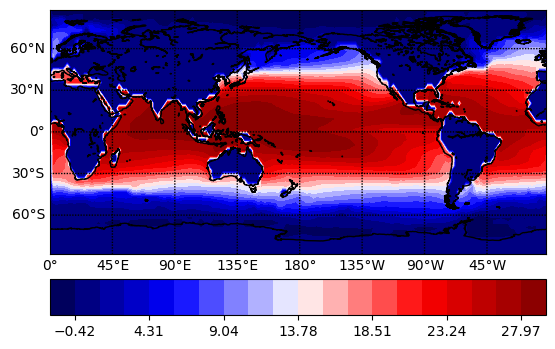

<Figure size 640x480 with 0 Axes>

In [6]:
plot_map(lon_sst,lat_sst,trX_SST.mean((0,1)),'file.png')

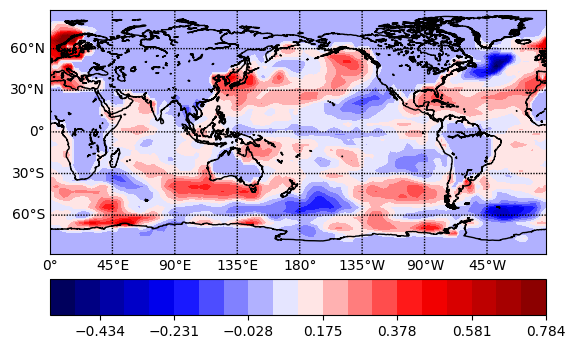

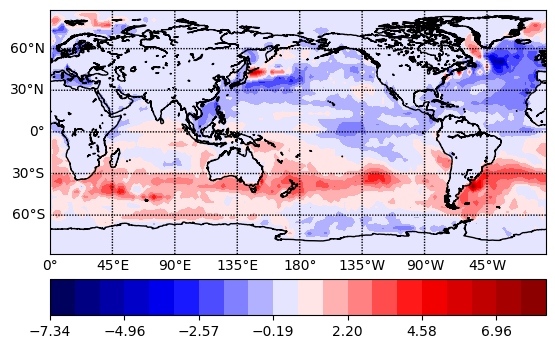

<Figure size 640x480 with 0 Axes>

In [7]:
from scipy.signal import detrend

# anomaly for simulated and observed data
trY_SST_anomaly=trY_SST-trY_SST.mean(0)
trY_SST_detrend = detrend(trY_SST_anomaly,axis=0)

trX_SST_anomaly=trX_SST-trX_SST.mean(0)
trX_SST_detrend = detrend(trX_SST_anomaly,axis=0)


plot_map(lon_sst,lat_sst,trY_SST_detrend[0][0],'file.png')

plot_map(lon_sst,lat_sst,trX_SST_detrend[0][0],'file.png')

/tmp/ipykernel_63569/4272650463.py:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  solver1 = Eof(np.array(trY_SST.mean(0)), weights=wgts)


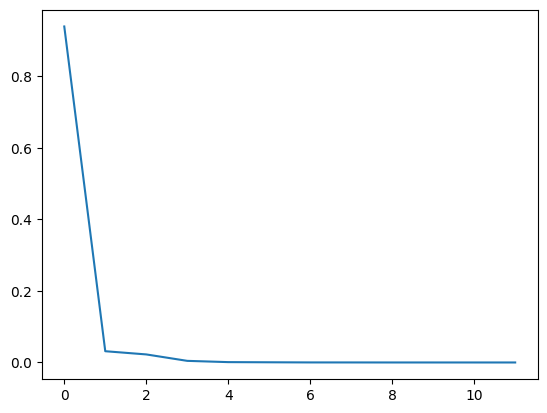

EOF for simulated data:---


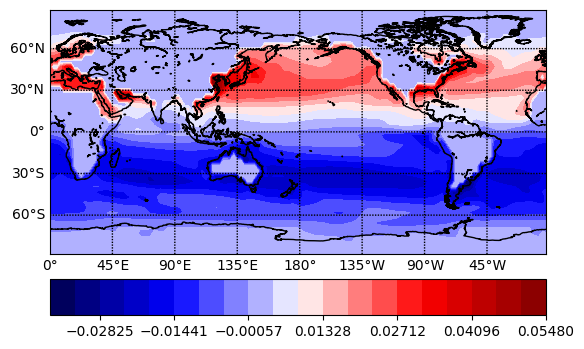

<Figure size 640x480 with 0 Axes>

In [8]:
from eofs.standard import Eof
# Empirical Orthogonal Function for Principal component analysis for the simulated yearly mean data
wgts   = np.cos(np.deg2rad(lat_sst))
wgts   = wgts.reshape(len(wgts), 1)
solver1 = Eof(np.array(trY_SST.mean(0)), weights=wgts)

eof1 = solver1.eofs(neofs=10)
pc1  = solver1.pcs(npcs=10, pcscaling=0)
varfrac1 = solver1.varianceFraction()
lambdas1 = solver1.eigenvalues()
plt.plot(varfrac1)
plt.show()
print('EOF for simulated data:---')
plot_map(lon_sst,lat_sst,eof1[0],'file.png')

/tmp/ipykernel_63569/2185055538.py:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  solver1 = Eof(np.array(trX_SST.mean(0)), weights=wgts)


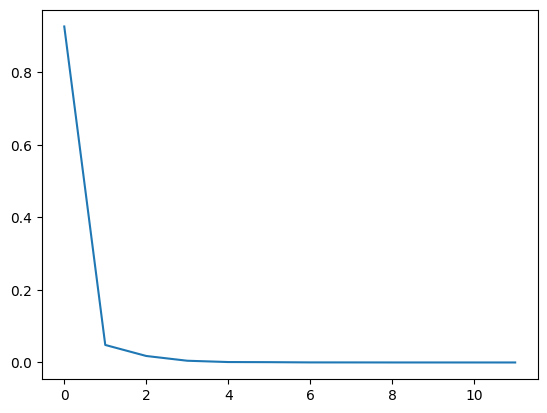

EOF for observed data:---


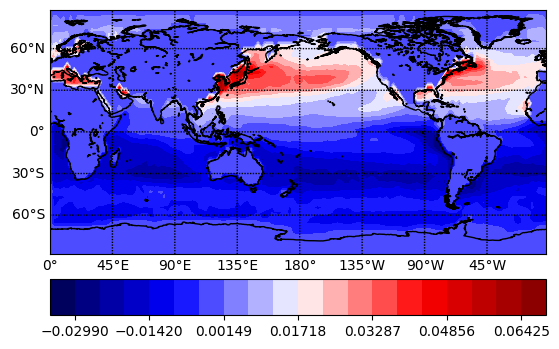

<Figure size 640x480 with 0 Axes>

In [9]:
from eofs.standard import Eof
# Empirical Orthogonal Function for Principal component analysis for the simulated yearly mean data
wgts   = np.cos(np.deg2rad(lat_sst))
wgts   = wgts.reshape(len(wgts), 1)
solver1 = Eof(np.array(trX_SST.mean(0)), weights=wgts)

eof1 = solver1.eofs(neofs=10)
pc1  = solver1.pcs(npcs=10, pcscaling=0)
varfrac1 = solver1.varianceFraction()
lambdas1 = solver1.eigenvalues()
plt.plot(varfrac1)
plt.show()
print('EOF for observed data:---')
plot_map(lon_sst,lat_sst,eof1[0],'file.png')

Month:-0


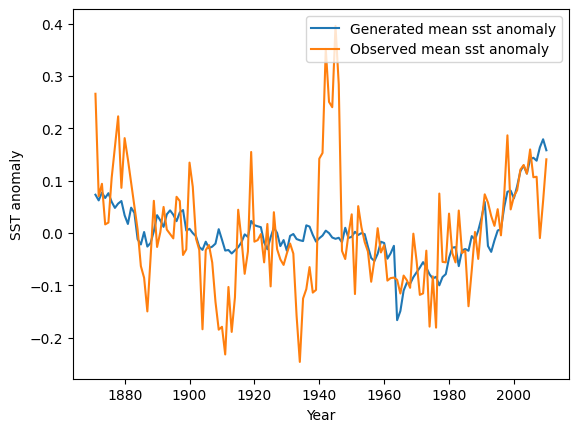

Month:-1


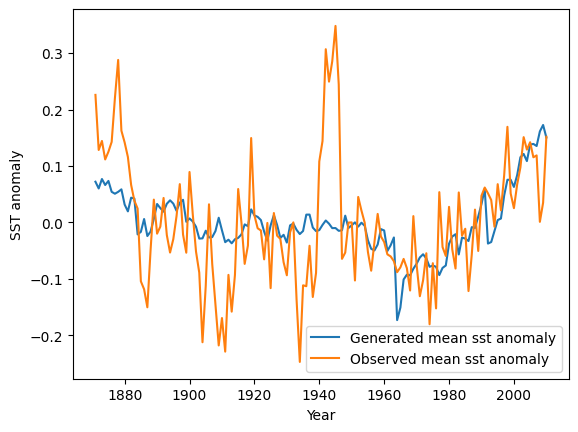

Month:-2


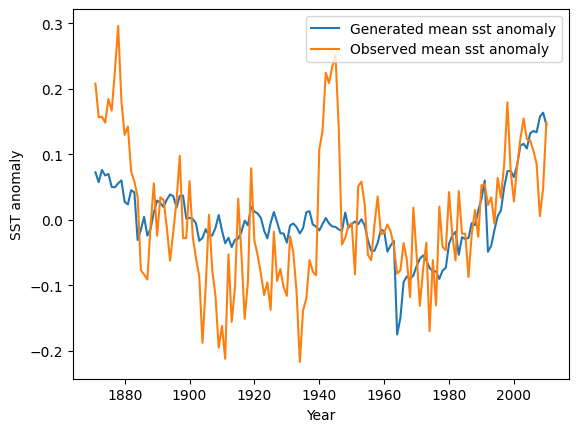

In [10]:

trY_SST_anom_mean=trY_SST_detrend.mean((-2,-1))
trX_SST_anom_mean=trX_SST_detrend.mean((-2,-1))

for month in range(3):
    print("Month:-"+str(month))
    plt.plot(trY_SST_ds.years[21:-4],trY_SST_anom_mean[:,month],label='Generated mean sst anomaly')
    plt.plot(trY_SST_ds.years[21:-4],trX_SST_anom_mean[:,month],label='Observed mean sst anomaly')
    plt.xlabel('Year')
    plt.ylabel('SST anomaly')
    plt.legend()
    plt.show()

Month:-2


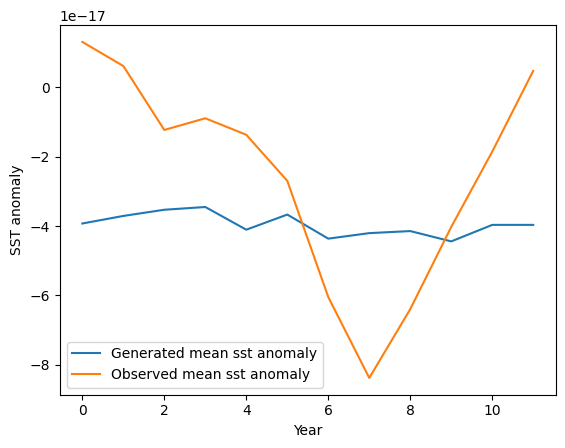

In [11]:
trY_SST_anom_mean=trY_SST_detrend.mean((-2,-1))
trX_SST_anom_mean=trX_SST_detrend.mean((-2,-1))

print("Month:-"+str(month))
plt.plot(trY_SST_ds.mon,trY_SST_anom_mean.mean(0),label='Generated mean sst anomaly')
plt.plot(trY_SST_ds.mon,trX_SST_anom_mean.mean(0),label='Observed mean sst anomaly')
plt.xlabel('Year')
plt.ylabel('SST anomaly')
plt.legend()
plt.show()

In [12]:
trY_SST_anom_mean.shape

(140, 12)

Month:-2


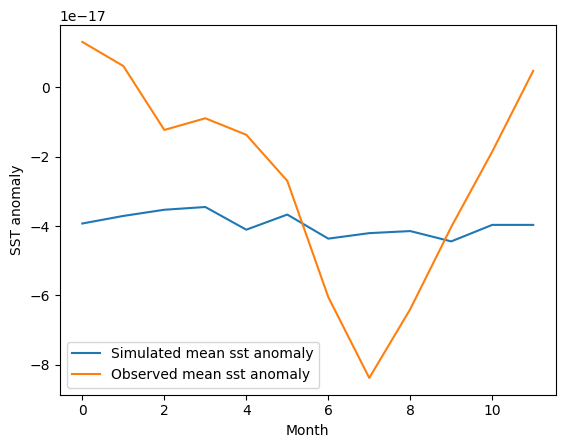

In [13]:
trY_SST_anom_mean=trY_SST_detrend.mean((-2,-1))
trX_SST_anom_mean=trX_SST_detrend.mean((-2,-1))

print("Month:-"+str(month))
plt.plot(trY_SST_ds.mon,trY_SST_anom_mean.mean(0),label='Simulated mean sst anomaly')
plt.plot(trX_SST_ds.mon,trX_SST_anom_mean.mean(0),label='Observed mean sst anomaly')
plt.xlabel('Month')
plt.ylabel('SST anomaly')
plt.legend()
plt.show()

In [14]:
ONI_sim=trY_SST_ds.sel(lat=slice(-5.0,5.0),lon=slice(170,240),years=slice(1871,2010))['sst'].mean(['ensemble','lat','lon'])
ONI_obs=trX_SST_ds.sel(lat=slice(-5.0,5.0),lon=slice(170,240))['sst'].mean(['lat','lon'])

In [71]:
ONI_sim.values.shape

(25, 140, 12)

Month:-0


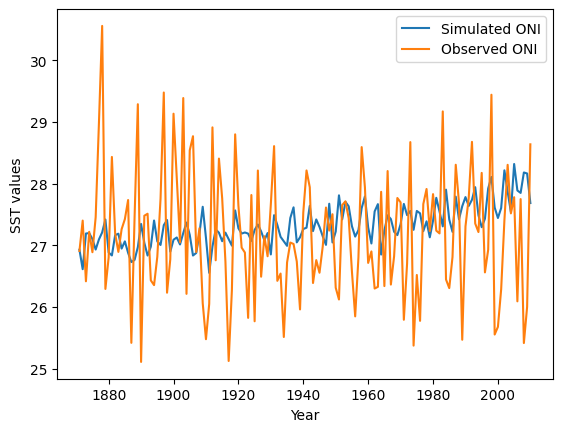

Month:-1


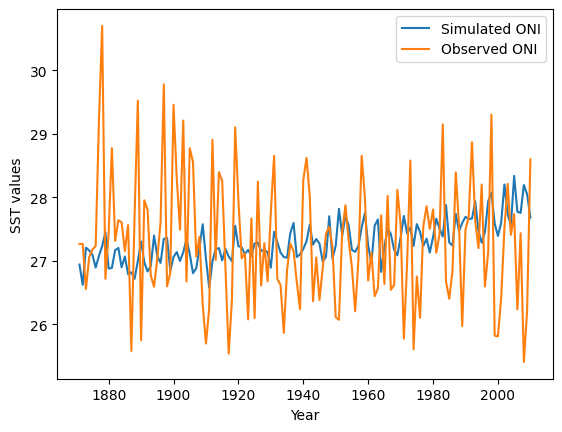

Month:-2


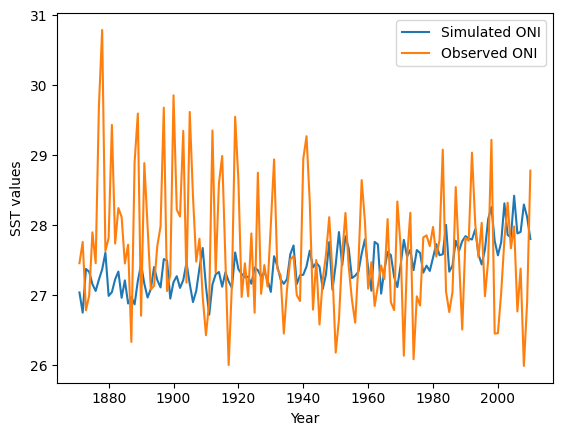

Month:-3


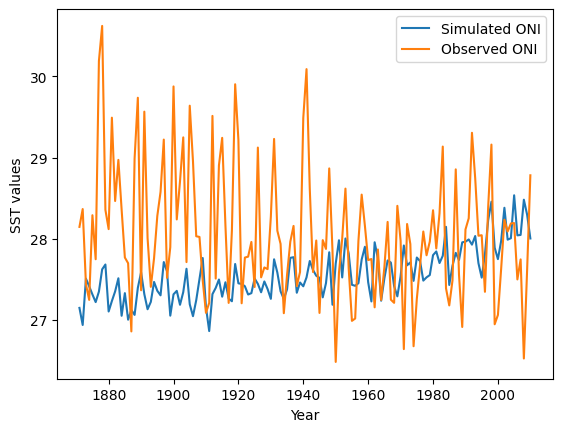

Month:-4


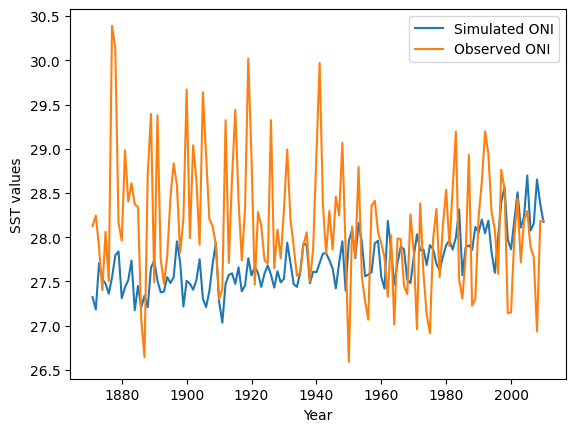

Month:-5


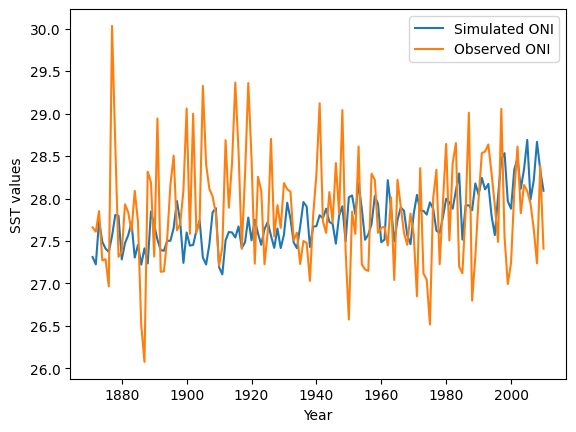

Month:-6


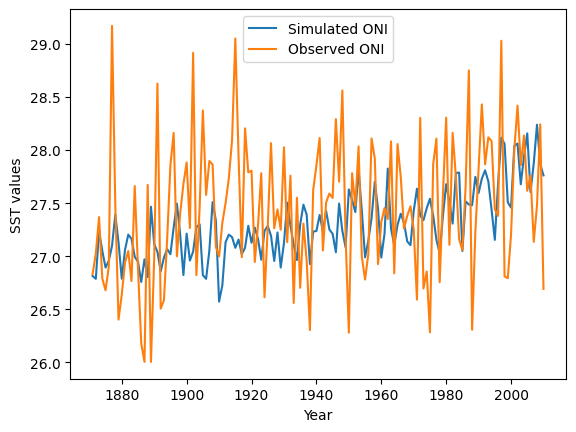

Month:-7


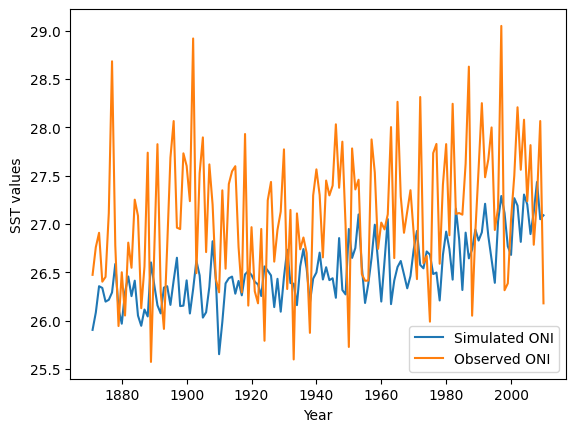

Month:-8


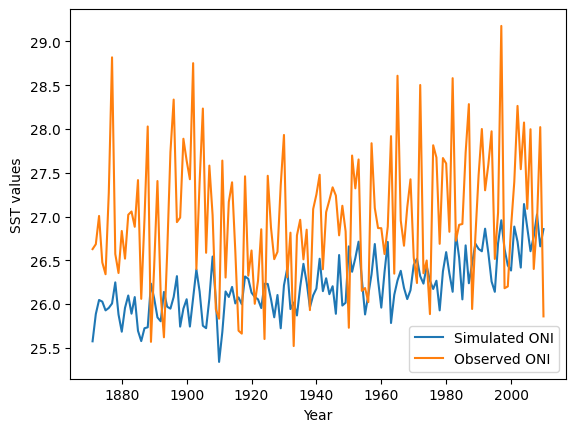

Month:-9


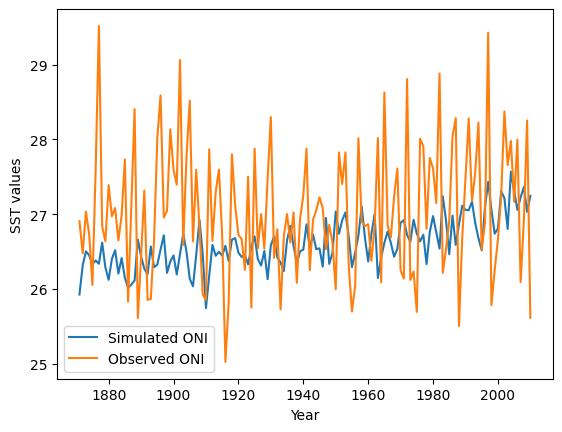

Month:-10


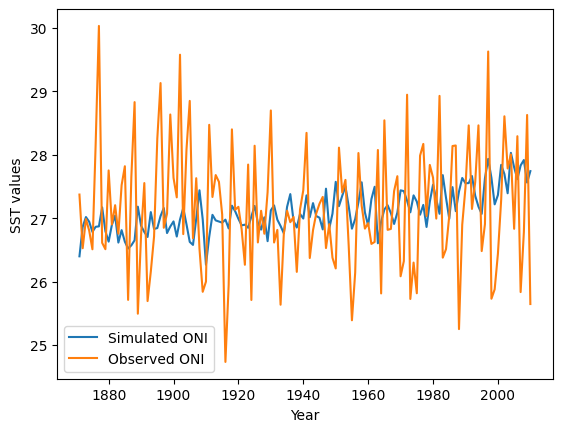

Month:-11


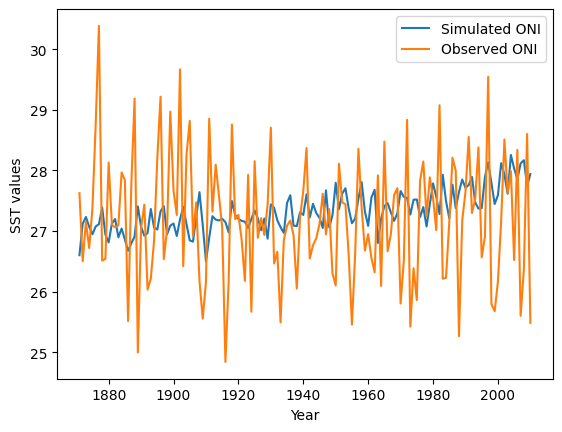

In [15]:
for month in range(12):
    print("Month:-"+str(month))
    plt.plot(ONI_sim.years,ONI_sim.values[:,month],label='Simulated ONI')
    
    plt.plot(ONI_sim.years,ONI_obs.values[:,month],label='Observed ONI')
    plt.xlabel('Year')
    plt.ylabel('SST values')
    plt.legend()
    plt.show()

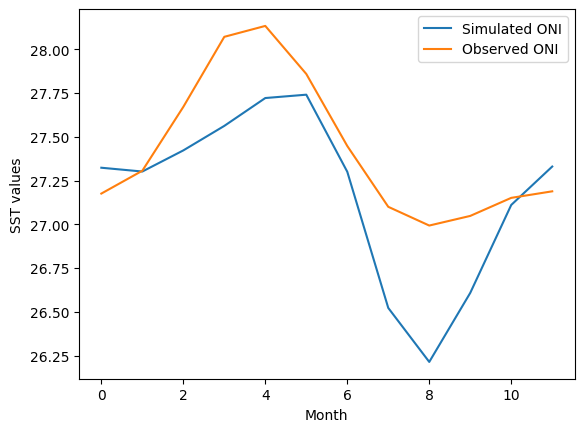

In [16]:

plt.plot(ONI_sim.mon,ONI_sim.values.mean(0),label='Simulated ONI')

plt.plot(ONI_sim.mon,ONI_obs.values.mean(0),label='Observed ONI')
plt.xlabel('Month')
plt.ylabel('SST values')
plt.legend()
plt.show()

Month:-0


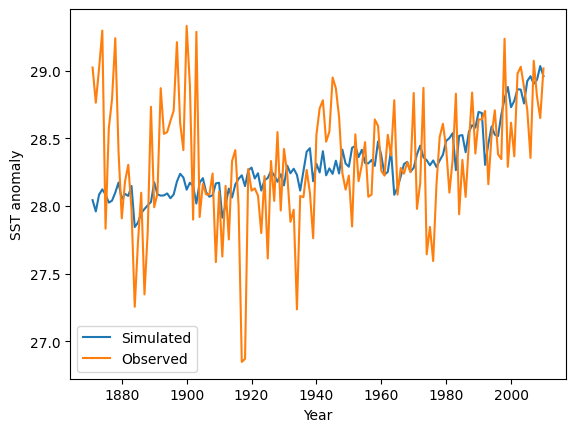

Month:-1


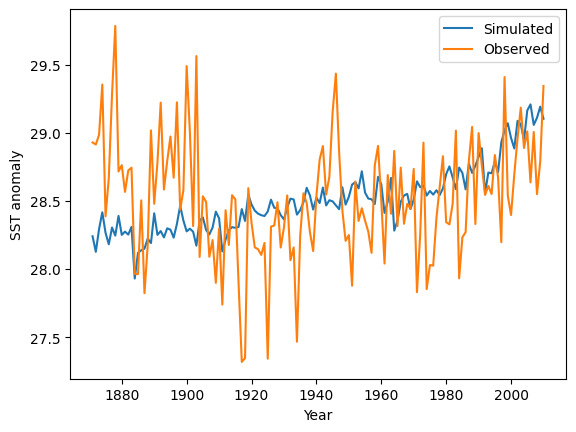

Month:-2


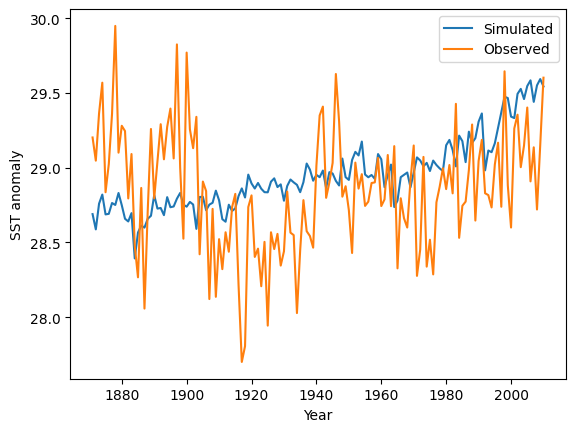

Month:-3


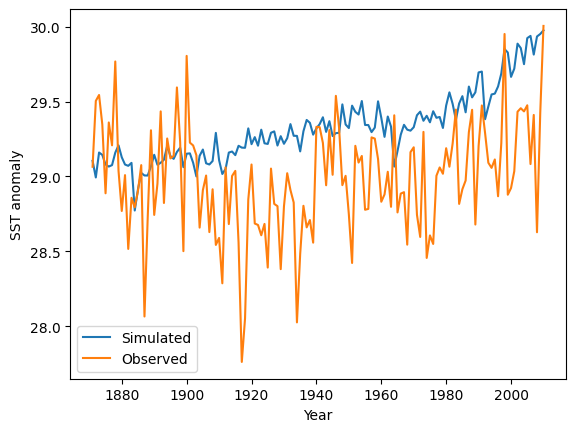

Month:-4


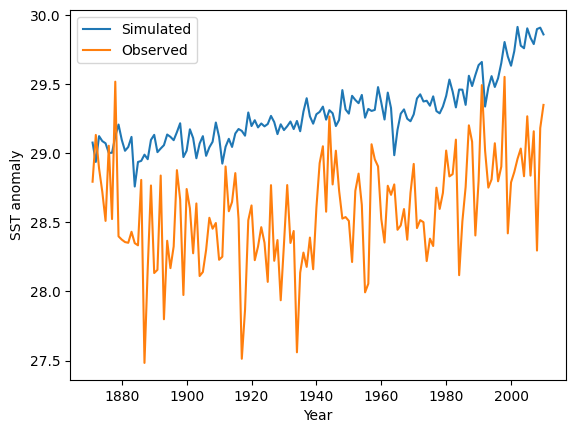

Month:-5


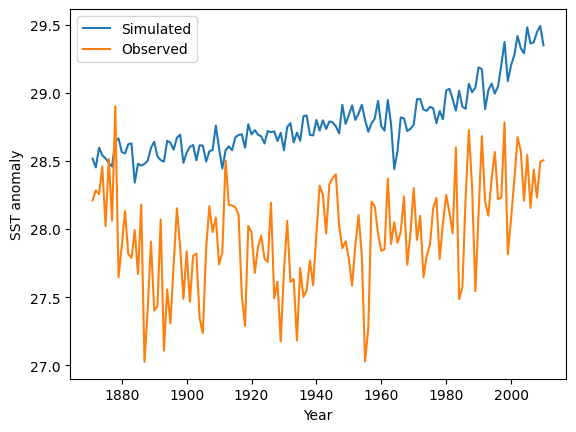

Month:-6


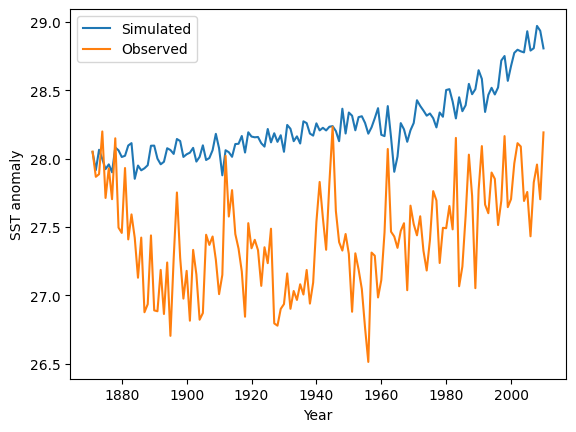

Month:-7


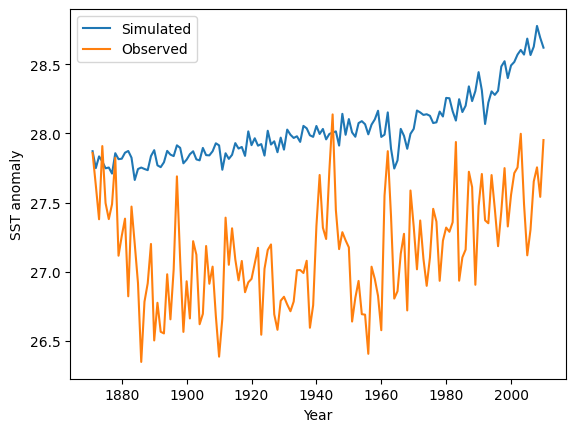

Month:-8


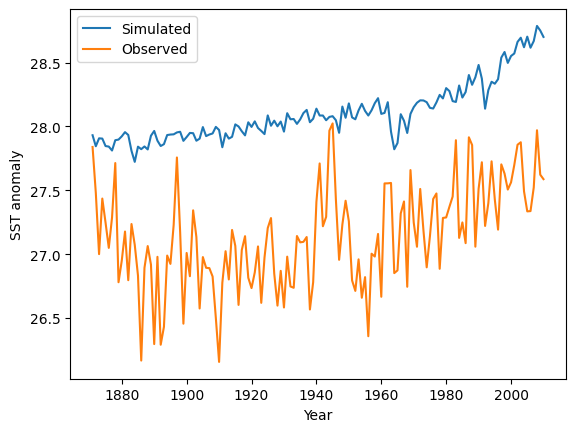

Month:-9


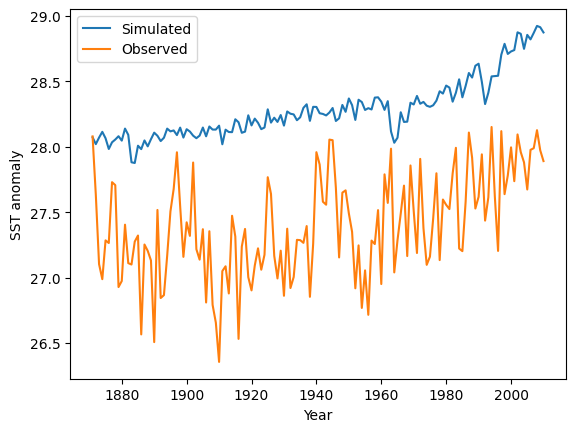

Month:-10


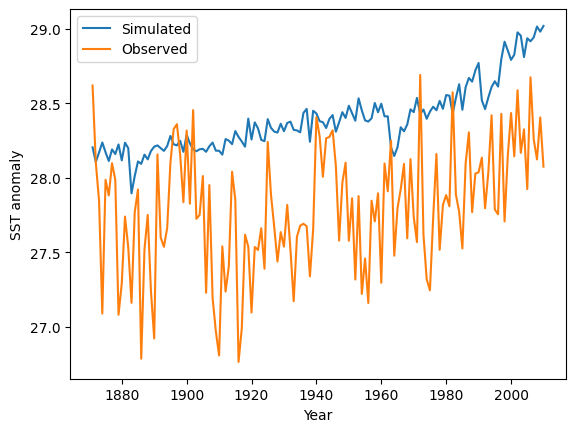

Month:-11


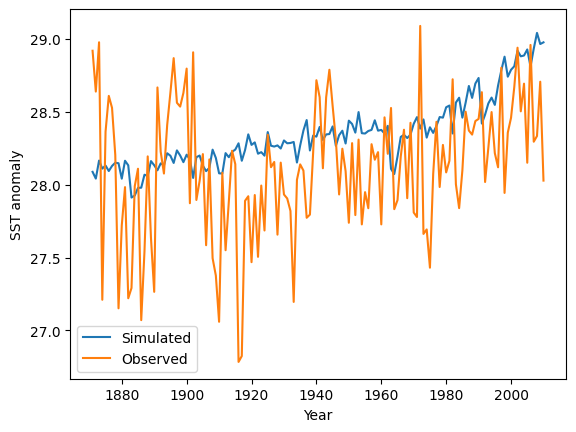

In [17]:
IO_sim=trY_SST_ds.sel(lat=slice(-10.0,5.0),lon=slice(60,80),years=slice(1871,2010))['sst'].mean(['ensemble','lat','lon'])

IO_obs=trX_SST_ds.sel(lat=slice(-10.0,5.0),lon=slice(60,80))['sst'].mean(['lat','lon'])

for month in range(12):
    print('Month:-'+str(month))
    plt.plot(IO_sim.years,IO_sim.values[:,month],label='Simulated')
    plt.plot(IO_obs.years,IO_obs.values[:,month],label='Observed')
    plt.xlabel('Year')
    plt.ylabel('SST anomaly')
    plt.legend()
    plt.show()

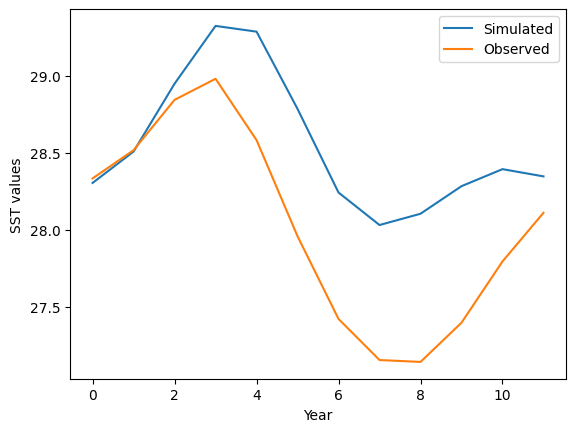

In [18]:
IO_sim=trY_SST_ds.sel(lat=slice(-10.0,5.0),lon=slice(60,80),years=slice(1871,2010))['sst'].mean(['ensemble','lat','lon'])

IO_obs=trX_SST_ds.sel(lat=slice(-10.0,5.0),lon=slice(60,80))['sst'].mean(['lat','lon'])


plt.plot(IO_sim.mon,IO_sim.values.mean(0),label='Simulated')
plt.plot(IO_obs.mon,IO_obs.values.mean(0),label='Observed')
plt.xlabel('Year')
plt.ylabel('SST values')
plt.legend()
plt.show()

Month:-0


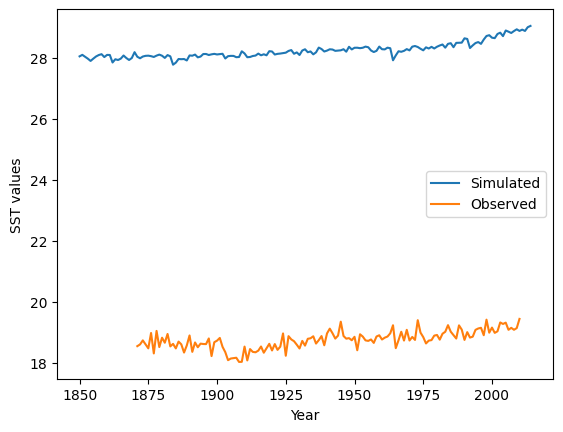

Month:-1


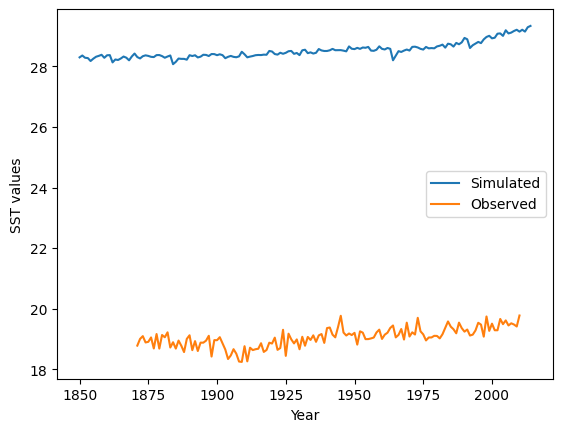

Month:-2


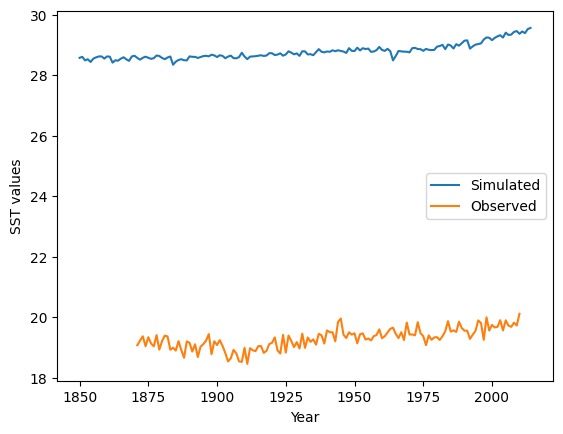

Month:-3


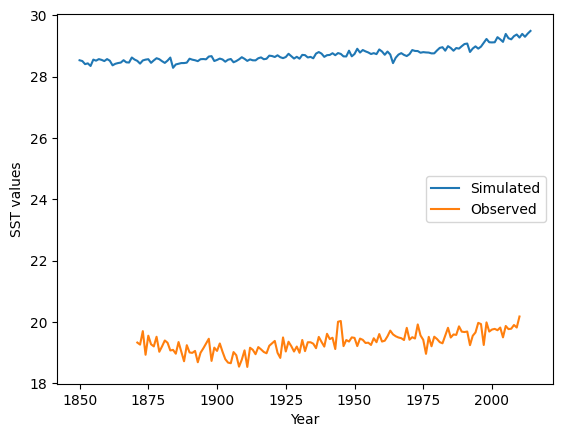

Month:-4


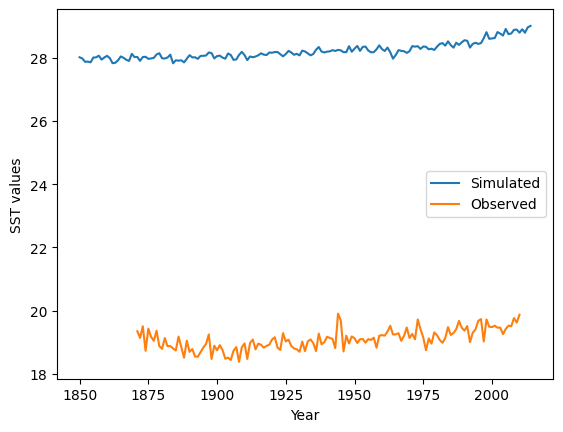

Month:-5


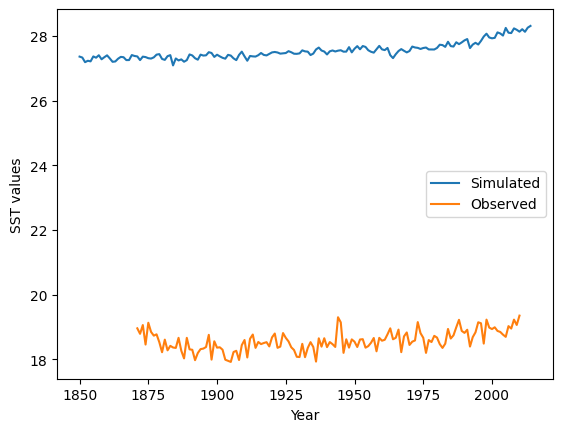

Month:-6


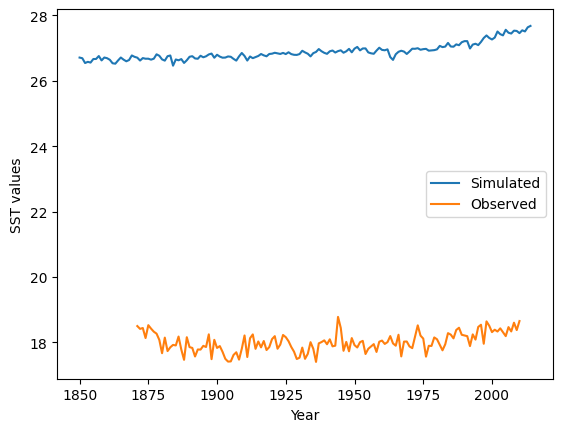

Month:-7


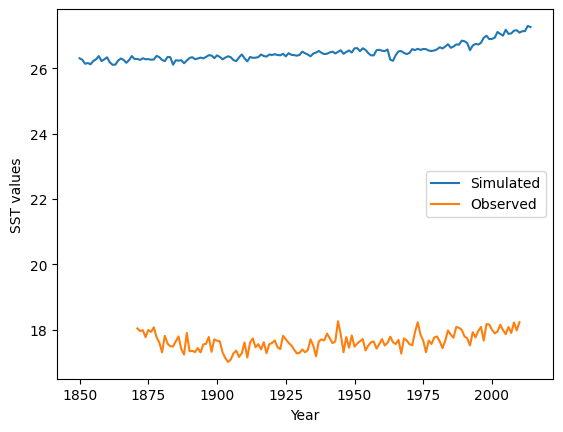

Month:-8


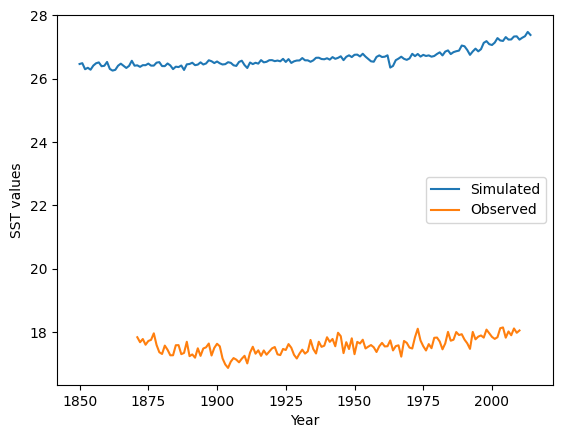

Month:-9


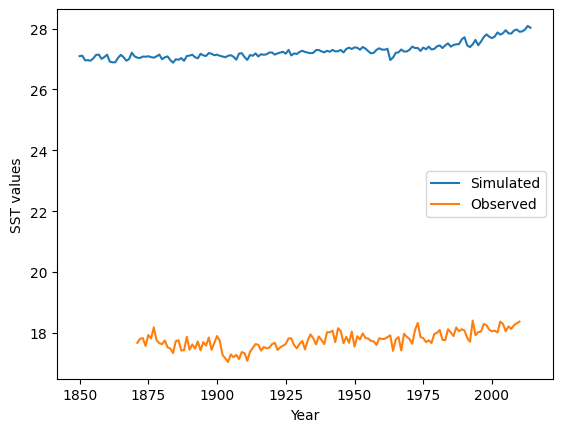

Month:-10


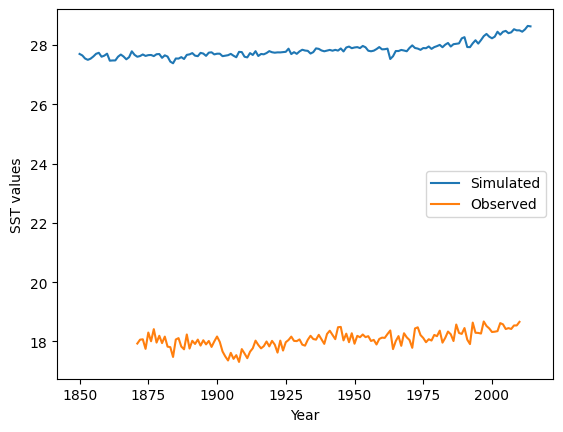

Month:-11


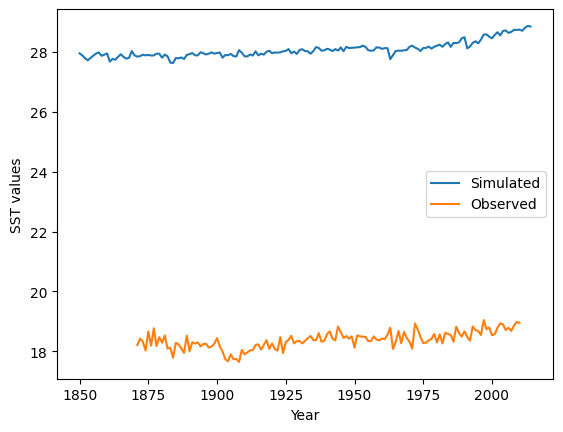

In [19]:
Index_2_sim=xr.concat([trY_SST_ds.sel(lat=slice(-20.0,10.0),lon=slice(0,15))['sst'],trY_SST_ds.sel(lat=slice(-20.0,10.0),lon=slice(310,360))['sst']],"lon").mean(['ensemble','lat','lon'])

Index_2_obs=xr.concat([trX_SST_ds.sel(lat=slice(-20.0,10.0),lon=slice(0,15))['sst'],trX_SST_ds.sel(lat=slice(-20.0,10.0),lon=slice(310,360))['sst']],"lon").mean(['lat','lon'])

for month in range(12):
    print("Month:-"+str(month))
    plt.plot(Index_2_sim.years,Index_2_sim[:,month],label='Simulated')
   
    plt.plot(Index_2_obs.years,Index_2_obs[:,month],label='Observed')
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('SST values')
    plt.legend()
    plt.show()



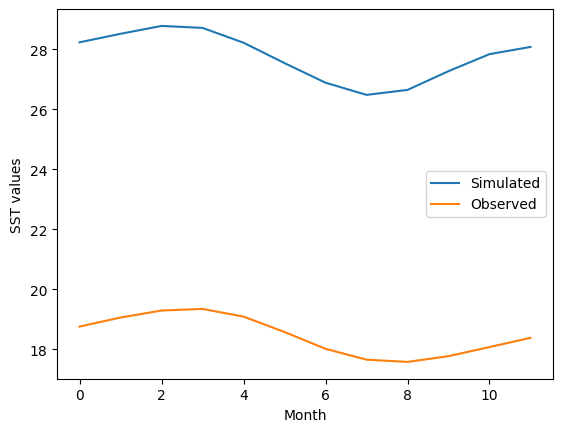

In [20]:
plt.plot(Index_2_sim.mon,Index_2_sim.mean('years'),label='Simulated')

plt.plot(Index_2_sim.mon,Index_2_obs.mean('years'),label='Observed')
plt.legend()
plt.xlabel('Month')
plt.ylabel('SST values')
plt.legend()
plt.show()

In [35]:
trY_SST_ds['sst'].values.mean(0).shape

(165, 12, 48, 144)

In [21]:
for month in range(1):
    print('Month:-'+str(month))
    std_map1=[]
    for i in range(48):
        std_map2=[]
        for j in range(144):
            std_map2.append(np.std(trY_SST_ds['sst'].values.mean(0)[:,month,i,j].flatten()))
        std_map1.append(np.array(std_map2))
    std_map1=np.array(std_map1)
    print("Standard Deviation maps for simulated")
    plot_map(lon_sst,lat_sst,std_map1,'file.png')

  

    std_map1=[]
    for i in range(48):
        std_map2=[]
        for j in range(144):
            std_map2.append(np.std(trX_SST_ds['sst'].values[:,month,i,j].flatten()))
        std_map1.append(np.array(std_map2))
    std_map1=np.array(std_map1)
    print("Standard Deviation maps for Observed")
    plot_map(lon_sst,lat_sst,std_map1,'file.png')

Month:-0
